<a href="https://colab.research.google.com/github/Martinccv/Clases-DS/blob/main/Clase23_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Area bajo la curva ROC

Vamos a basarnos en un ejemplo de la documentación de sklearn: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [171]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [172]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [173]:
y_test[:5]

array([2, 1, 0, 2, 0])

En la siguiente celda aplicamos un one hot enconding a el target con label_binarize.

In [174]:
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]
print(y_test[:5])

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]


In [175]:
n_classes

3

Prestar atención en la siguiente celda:

En lugar de utilizar predict, utilizamos predict_proba que nos retorna una probabilidad por cada clase.

In [176]:
# Learn to predict each class
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
print(y_score[:5])

[[0.08 0.4  0.52]
 [0.2  0.4  0.4 ]
 [0.58 0.38 0.04]
 [0.08 0.4  0.52]
 [0.58 0.38 0.04]]


Por cada clase, calculamos la curva ROC

In [177]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [178]:
fpr

{0: array([0.        , 0.        , 0.11111111, 0.16666667, 0.24074074,
        0.25925926, 0.2962963 , 0.31481481, 1.        ]),
 1: array([0.        , 0.55555556, 1.        ]),
 2: array([0.        , 0.2745098 , 0.29411765, 0.33333333, 0.35294118,
        0.41176471, 0.47058824, 0.58823529, 0.98039216, 1.        ])}

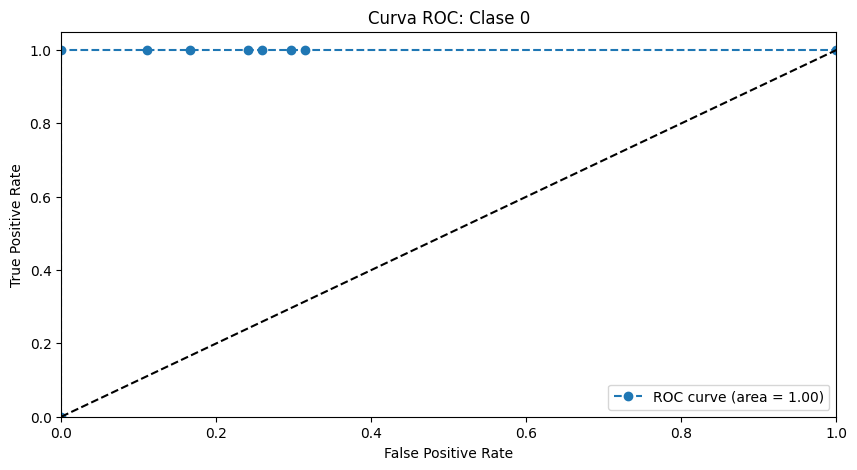

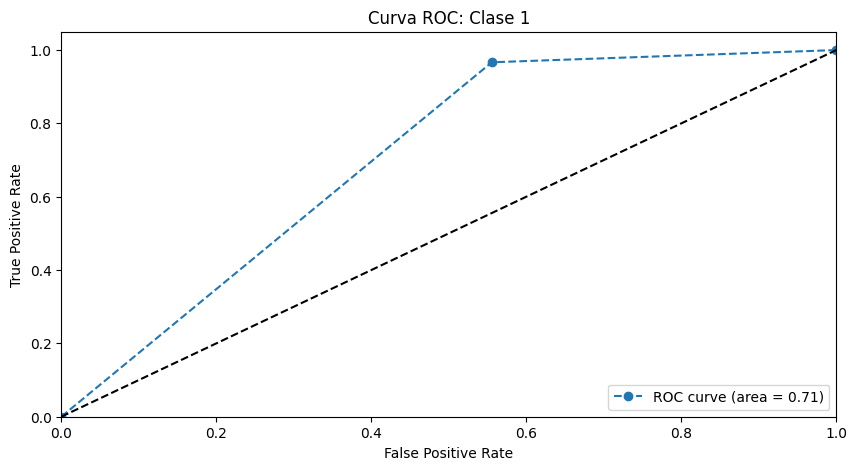

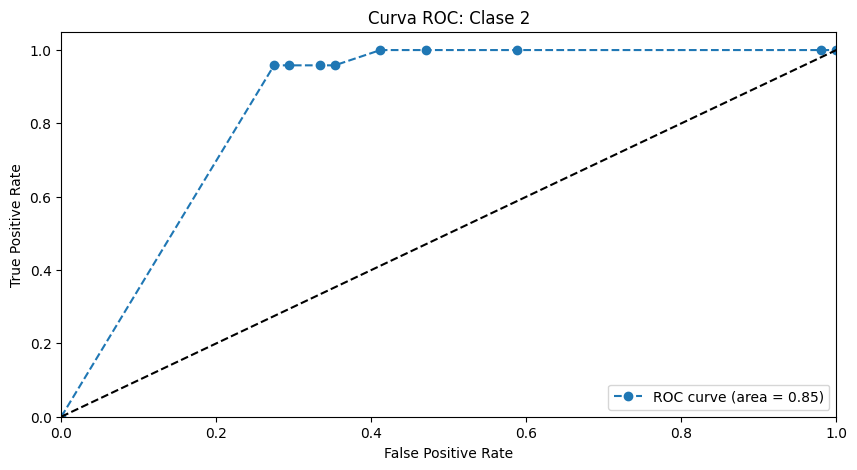

In [179]:
for i in range(n_classes):
    plt.figure(figsize=(10,5))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.show()

# Ejercicio

Por grupo buscar un dataset de clasificación binario, entrenar un modelo y graficar la curva ROC.

Algunos datasets pueden ser:
- Titanic
- NBA (clase 19)
- Breast Cancer Wisconsin
- Heart disease https://www.kaggle.com/ronitf/heart-disease-uci

Luego haremos una puesta en comùn entre todos

In [180]:
#Importamos todas las librerias que vamos a usar
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [181]:
#Traemos el dataframe para trabajarlo
df_titanic=pd.read_csv("/content/titanic.csv")

In [182]:
#Observamos que datos tiene el df
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
#Vemos si existen nulos
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [184]:
#Eliminamos columnas que no vamos a utilizar para analizar el df
df_titanic_clean = df_titanic.drop(columns=["Cabin","PassengerId","Name","Ticket"])
#Usamos la media para rellenar la edad
mean_age = df_titanic_clean['Age'].mean()
df_titanic_clean['Age'].fillna(mean_age, inplace=True)

In [185]:
#Elegimos las columnas categoricas
categorical_cols = ['Sex', 'Embarked', 'Pclass']
# Inicializa el OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')  # drop='first' para evitar la multicolinealidad

# Aplica el OneHotEncoder y transforma los datos
encoded_cols = ohe.fit_transform(df_titanic_clean[categorical_cols])

# Convierte los datos codificados en un DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(categorical_cols))

# Une el DataFrame codificado con el DataFrame original (excluyendo las columnas originales codificadas)
df_titanic_limpio = df_titanic_clean.drop(categorical_cols, axis=1)
df_titanic_limpio = pd.concat([df_titanic_limpio, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [186]:
#Vemos si ya nos queda acondicionado para empezar el modelo
df_titanic_limpio

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_nan,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.000000,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0
2,1,26.000000,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
3,1,35.000000,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0
4,0,35.000000,0,0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1.0,0.0,1.0,0.0,1.0,0.0
887,1,19.000000,0,0,30.0000,0.0,0.0,1.0,0.0,0.0,0.0
888,0,29.699118,1,2,23.4500,0.0,0.0,1.0,0.0,0.0,1.0
889,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,0.0,0.0


In [187]:
#Separamos el df para predecir los sobrevivientes
X= df_titanic_limpio.drop(columns="Survived")
y= df_titanic_limpio["Survived"]

In [188]:
X

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_nan,Pclass_2,Pclass_3
0,22.000000,1,0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0
1,38.000000,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0
2,26.000000,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0
3,35.000000,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0
4,35.000000,0,0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,1.0,0.0,1.0,0.0,1.0,0.0
887,19.000000,0,0,30.0000,0.0,0.0,1.0,0.0,0.0,0.0
888,29.699118,1,2,23.4500,0.0,0.0,1.0,0.0,0.0,1.0
889,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,0.0,0.0


In [189]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [190]:
#Usamos train_test_split para separar los datos 80% para entrenar y 20% para testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [216]:
# Entrena el modelo con estimador Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predecimos y evaluamos el modelo
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'AUC-ROC: {auc_roc}')

Accuracy: 0.8268156424581006
Confusion Matrix:
[[98 12]
 [19 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

AUC-ROC: 0.8783926218708827


In [217]:
# Buscamos los mejores hiperparametros para mejorar los valores de roc_auc
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 110, 120, 130],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=2,
                           n_jobs=-1,
                           verbose=2)

In [218]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120, 130]},
             scoring='roc_auc', verbose=2)

In [219]:
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best AUC-ROC score: {grid_search.best_score_}')

Best parameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best AUC-ROC score: 0.8569376309361043


In [220]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'AUC-ROC: {auc_roc}')

Accuracy: 0.8435754189944135
Confusion Matrix:
[[103   7]
 [ 21  48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       110
           1       0.87      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179

AUC-ROC: 0.8851778656126483


In [221]:
accuracy

0.8435754189944135

In [222]:
conf_matrix

array([[103,   7],
       [ 21,  48]])

In [223]:
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       110
           1       0.87      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



In [224]:
auc_roc

0.8851778656126483

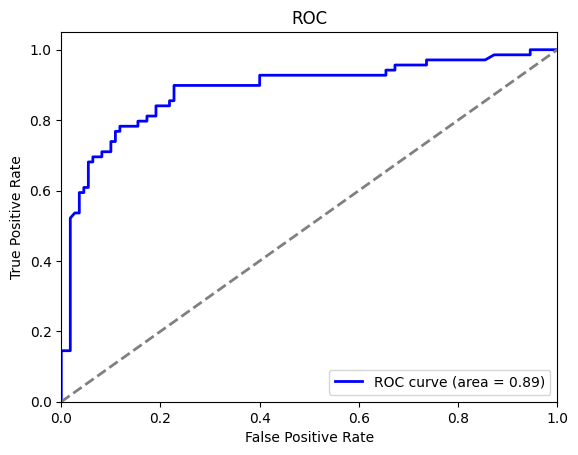

In [225]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()